In [47]:
import PIL
import numpy
import math
from PIL import Image, ImageDraw, ImageFont
from matplotlib import cm

In [231]:
def interpolate(a0,a1,w):
  
  #return (a1 - a0) * (3.0 - w * 2.0) * w * w + a0;
 return (a1 - a0) * w + a0;


In [14]:
class vector2:
  x = None
  y = None

In [15]:
def randomGradient(ix, iy):
    random = 2920.0 * math.sin(ix * 21942.0 + iy * 171324.0 + 8912.0) * math.cos(ix * 23157.0 * iy * 217832.0 + 9758.0)
    v = vector2
    v.x = math.cos(random)
    v.y = math.sin(random)
    return v

In [16]:
def dotGridGradient(ix,iy,x,y):
    gradient = randomGradient(ix, iy)
    dx = x - ix;
    dy = y - iy;
    return (dx*gradient.x + dy*gradient.y);

In [242]:
def perlin(x,y): 
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1
    sx = x - x0
    sy = y - y0
    n0 = dotGridGradient(x0, y0, x, y)
    n1 = dotGridGradient(x1, y0, x, y)
    ix0 = interpolate(n0, n1, sx)
    n0 = dotGridGradient(x0, y1, x, y)
    n1 = dotGridGradient(x1, y1, x, y)
    ix1 = interpolate(n0, n1, sx)
    value = interpolate(ix0, ix1, sy)
    if value >= .2:
      return 0.5 + value
    else:
      return 0.2 + value
    return value


In [238]:
print(perlin(.3,.3))
print(perlin(.4,.3))

0.2
0.2


In [243]:
rows =200
columns= 200
n = [[0 for x in range(columns)] for x in range(rows)]
for i in range(rows):
    for j in range(columns):
        n[i][j] = perlin(i/rows,j/columns)

  
  

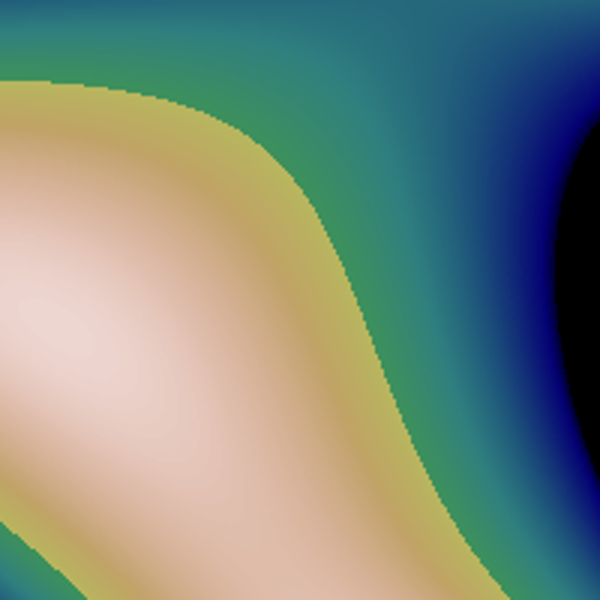

In [246]:

a = numpy.array(n)
img = Image.fromarray(numpy.uint8(cm.gist_earth(a)*255))
img
newsize = (600, 600)
im1 = img.resize(newsize)
im1

